# DESAFIO 02  -  (Tolueno-Benzeno)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown
plt.style.use('seaborn-bright')

 **O que precisamos :**
 
* A separação dos líquidos na mistura e a evaporação do combustível.<dt>

* O volume final da mistura calculado a partir dos volumes parciais molares.<dt>

* O comportamento da mistura de líquido (ideal ou não ideal).<dt>

* As características do diagrama de fases da mistura líquida.<dt>

* A pressão de vapor dos compostos.<dt>

### Separação das Misturas

Vamos separar nossos líquidos através de destilação.
Conforme vamos evaporando nosso líquido, a concentração da mistura se altera, visto que um dos compostos vai estar sendo mais evaporado do que o outro, de acordo com as condições do sistema(pressão parcial na temperatura T, concentração e temperatura).<dt>

Nosso objetivo é evaporar o Benzeno, que está na concentração de 33% da misutura (proporção de 1 para 2 benzeno-tolueno), assim separando os dois líquidos.
    Segue o diagrama de fases:

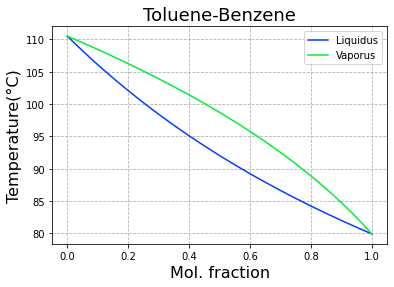

In [ ]:
fase = pd.read_csv('benzene-toluene-phase-diagram.txt')
x=list(fase.iloc[:,1])
y=list(fase.iloc[:,2])
T=list(fase.iloc[:,0])
fig, ax = plt.subplots(1,1)
ax.plot(x, T, label='Liquidus') 
ax.plot(y,T, label='Vaporus')
ax.set_title('Toluene-Benzene',fontsize = 18)
ax.set_xlabel('Mol. fraction',fontsize=16)
ax.set_ylabel('Temperature(°C)',fontsize=16)
plt.legend(loc='best') #legenda
plt.grid(linestyle = '--')

## Realizando a separação com a regra da escada:

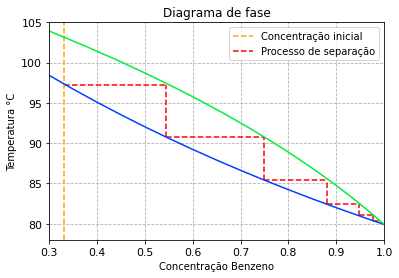

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_ylabel('Temperatura °C')
ax.set_xlabel('Concentração Benzeno')
ax.set_title("Diagrama de fase")
ax.axvline(0.33, linestyle = '--', c = 'orange', label = 'Concentração inicial')
ax.hlines(97.28, xmin = 0.33, xmax = 0.545, linestyle = '--', colors = 'r', label = "Processo de separação")
ax.vlines(0.545, ymin = 90.8, ymax = 97.28, linestyle = '--', colors = 'r')
ax.hlines(90.8, xmin = 0.545, xmax = 0.75, linestyle = '--', colors = 'r')
ax.vlines(0.75, ymin = 85.4, ymax = 90.8, linestyle = '--', colors = 'r')
ax.hlines(85.4, xmin = 0.75, xmax = 0.88, linestyle = '--', colors = 'r')
ax.vlines(0.88, ymin = 82.5, ymax = 85.4, linestyle = '--', colors = 'r')
ax.hlines(82.5, xmin = 0.88, xmax = 0.947, linestyle = '--', colors = 'r')
ax.vlines(0.947, ymin = 81, ymax = 82.5, linestyle = '--', colors = 'r')
ax.hlines(81.02, xmin = 0.947, xmax = 0.978, linestyle = '--', colors = 'r')
ax.vlines(0.978, ymin = 80.38, ymax = 81.02, linestyle = '--', colors = 'r')
ax.hlines(80.38, xmin = 0.978, xmax = 0.991, linestyle = '--', colors = 'r')
ax.plot(x, T) 
ax.plot(y,T)
ax.set_xlim(0.3, 1.0)
ax.set_ylim(78, 105)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(linestyle = '--')
ax.legend()
plt.savefig('escadinha.png', dpi = 200)

Temperaturas coluna:<br>
$97.3 °C\rightarrow 90.8°C \rightarrow 85.4 °C\rightarrow 82.5°C\rightarrow 81.0°C \rightarrow 80.4°C\rightarrow 80.1°C$ <br>
Concentrações esperadas:<br>
$ 0.33 \rightarrow 0.55 \rightarrow 0.75 \rightarrow 0.88 \rightarrow 0.95 \rightarrow 0.98 \rightarrow 0.99 $

### Para calcular o volume da mistura (por mol):

In [6]:
def volume_mistura_mol(x1,massa_molar_1,massa_molar_2,densidade_mistura,n_total_mol):
    volume_molar = (((x1*massa_molar_1) + ((1-x1)*massa_molar_2))/(densidade_mistura)) #para 1 mol
    return volume_molar

massa_molar_benzeno = 78.11 #g/mol
massa_molar_tolueno = 92.14 #g/mol
x1_mistura = 0.33 #quantidade molar de benzeno, complementar a de tolueno
x2_mistura = (1-x1_mistura) #quantidade molar de tolueno
massa = 1000 #Kg
#nos dados a densidade se apresenta em g/ml, converte-se para g/L
#para converter para g/L = 0.81*100000
densidade_da_mistura = 0.81 #g/mL #considerando x1, a 80°C

volume_da_mistura_1_mol = volume_mistura(x1_mistura, massa_molar_benzeno, massa_molar_tolueno, densidade_da_mistura, total_mol) #1 mol
numero_mol_mistura_benzeno = (x1_mistura*massa)/massa_molar_benzeno
numero_mol_mistura_tolueno = (x2_mistura*massa)/massa_molar_tolueno
numero_mol_total = numero_mol_mistura_benzeno + numero_mol_mistura_tolueno

#print(numero_mol_total)

#print(f'volume final da mistura {volume_da_mistura}'

print(f'volume final da mistura: {volume_da_mistura_1_mol*numero_mol_total} mL') #sem certeza da grandezza

NameError: name 'volume_mistura' is not defined

## Idealidade da mistura

A mistura Benzeno-Tolueno é ideal. Isso pode ser observado de algumas maneiras. Primeiramente, pode-se observar esse fenômeno pela estrutura químico-molecular muito parecida entre os duas moléculas. Naturalmente, isso implica que o tamanho das moléculas é muito próximo próximo, logo as interações moleculares dos compostos puros é muito parecida.

<dt>
<center>
<img src="toluene-benzene-molecules.png" style="height: 400px;"/>
</center>
</dt>

Imagem das moléculas que compõe as misturas.

Além disso, a mistura obedece a Lei de Raoult em toda a faixa de pressão, assim como demonstrado pelo gráfico (a 40°C):

##### Diagrama de pressão parcial molar e a total:<dt>
<center>
<img src="pressao-vapor-tol-ben-tot.png" style="height: 400px;"/>
</center>
</dt>


Dado o fato de que o plot de pressão de vapor x concentração molar parcial resultar em uma reta no total de pressão de vapor evidencia que a mistura é ideal.

#### Características do diagrama das fases da mistura líquida

Na mistura líquida, temos que o diagrama de fases se comporta de uma forma não azeotrópica, sendo ideal para a lei de Raoults de pressão parcial. Ou seja, a regra é verdadeira para nossa mistura:<dt>
 
    pA = xA.p*A
    pB = (1 - xA)p*B
       

Para encontrar a pressão de vapor das substâncias, usamos a fórmula de Antoine:<br>
<br>
$$ ln(p*[bar]) = A-\frac{B}{T[°C] + C}$$
<br>
Onde p* é a pressão de vapor da substância pura, T é a temperatura e A,B, C são as constantes de Antoine determinadas experimentalmente para cada substância. No caso do Benzeno, temos $A = 3.98523$, $B = 1184.24$ e $C = 217.572$ portanto:<br>
<br>
$$ p* = e^\left( {3.98523-\frac{1184.24}{T + 217.572}}\right) $$
<br>
Já para o tolueno, $A = 4.07827$, $B = 1343.943$ e $C = 219.387$ portanto:<br>
<br>
$$ p* = e^\left( {4.07827-\frac{1343.943}{T + 219.387}}\right) $$
<br>
Para a mistura, podemos usar o fato de que ela é ideal, portanto podemos usar a lei de Raoult para calcular a sua pressão de vapor:
<br>
<br>
$$p = x_1 e^\left( {3.98523-\frac{1184.24}{T + 217.572}}\right) + x_2 e^\left( {4.07827-\frac{1343.943}{T + 219.387}}\right) $$

In [ ]:
def pres(T, c1, c2):
    return c1*np.e**(3.98523 - (1184.24/(T+217.572)))+ c2*np.e**(4.07827 - (1343.943/(T+219.387)))
T = np.arange(80, 110, 0.01)
Ps = []
Cs = [0, 0.33/2, 0.33,  0.33+ 0.33/2, 0.66, 0.66 +  0.33/2, 1]
fig, ax = plt.subplots(1,1)
for i in range(len(Cs)):
    ax.plot(T, pres(T, Cs[i], 1-Cs[i]), label = f'C = {Cs[i]:.2f}')
ax.set_title("Pressão de Vapor em função da temperatura")
ax.set_xlabel("Temperatura [°C]")
ax.set_ylabel("Pressão de vapor [bar]")
ax.legend()

### Referências:

* Propriedades dos compostos:
http://www.vle-calc.com/compound_properties.html

* Densidade da mistura:
http://hdl.handle.net/1853/11963


* Imagem do gráfico de fase: <a href="https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/DeVoes_Thermodynamics_and_Chemistry/13%3A_The_Phase_Rule_and_Phase_Diagrams/13.02%3A__Phase_Diagrams-_Binary_Systems"> Diagrama de Fases Chem.libretexts </a> <br>


* Dados para o plot do gráfico de fase: http://vle-calc.com/phase_diagram.html
 

* Imagem das moléculas que compõem a mistura: <a href="https://www.researchgate.net/figure/Structures-of-benzene-and-toluene-Toluene-can-be-viewed-as-benzene-with-a-hydrogen-atom_fig6_262523807">Researchgate: moléculas da mistura </a> <br>


* Imagem da pressão parcial molar x proporção molar:
Physical Chemistry A Molecular Approach (Donald A. McQuarrie, John D. Simon)